# 3분 딥러닝 3장 실습

# 20171130 목
p.35~38

작성된 소스 코드의 출처 : https://github.com/golbin/TensorFlow-Tutorials

In [ ]:
import tensorflow as tf

In [ ]:
hello = tf.constant('Hello, TensorFlow!')
print(hello)

tf.constant의 반환값은 Tensor()라고 해서 자료형과 속성에 대해 설명한다.

In [ ]:
3

In [ ]:
[1., 2., 3.]

In [ ]:
[[1., 2., 3.], [4., 5., 6.]]

텐서는 텐서플로에서 수학식 계산을 위한 가장 기본적인 자료형.


랭크 = '\['의 갯수, 즉 차원 수. 
(예) 3 : 랭크 0, [3]: 랭크 1, [[3]]: 랭크 2, [[[3]]]: 랭크 3

랭크 0부터 순서대로, 스칼라, 벡터, 행렬, ... n차원 텐서라고 부른다.

셰이프는 랭크 별 원소 개수.
(예) 3 : 랭크 0 셰이프 \[\], \[3\] : 랭크 1 셰이프 \[1\], [[[1., 2., 3.]],[[1., 2., 3.]]] : 랭크 3 셰이프 [2, 1, 3]

In [ ]:
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)
print(c)

텐서플로우 프로그램 구조 : 1. 그래프 생성(동그라미, tf.constant, tf.add, ...) 2. 그래프 실행(Session run). 이런 실행 방식을 '지연 실행' 또는 'Lazy Evaluation'이라고 부른다.

In [ ]:
sess = tf.Session()

print(sess.run(hello))
print(sess.run([a, b, c]))

sess.close()

그래프의 실행은 세션 안에서 이루어져야 한다. 아래는 전체 코드

In [ ]:
import tensorflow as tf

hello = tf.constant('Hello, TensorFlow!')
print(hello)

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)
print(c)

sess = tf.Session()
print(sess.run(hello))
print(sess.run([a, b, c]))

sess.close()

정리 : 텐서플로우는 그래프 기반 머신러닝 라이브러리이다. 프로그램 실행은 그래프 생성, 그래프 실행 순으로 진행된다. 랭크는 \[의 개수이며 차원 수를 의미한다. 랭크 0부터 스칼라, 벡터, 행렬, ... n차원 텐서라고 부른다. 셰이프는 각 랭크 별 원소 수를 뜻한다. [제일 큰 랭크의 원소수, 그 다음 랭크의 원소 수, ... ]로 적힌다.

# 20171206 수
<br>
p.38~43
<br>
플레이스홀더와 변수
플레이스홀더 : 그래프에 입력 값을 담을 그릇(parameter)을 담당.
변수(variable) : 학습 함수들이 학습 결과를 갱신하기 위해 사용하는 변수(가중치).

In [ ]:
# None : 크기가 정해져 있지 않다.
X = tf.placeholder(tf.float32, [None, 3])
print(X)

In [ ]:
x_data = [[1,2,3],[1,2,3]]

In [ ]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([2, 1]))

tf.random_normal은 정규 분포를 따르는 무작위 값으로 초기화한다는 뜻.

In [ ]:
expr = tf.matmul(X, W) + b

[2,3]행렬 = 행이 2, 열이 3
<br>
(예) [[1,2,3],[1,2,3]] : [2, 3] 행렬

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("=== x_data ===")
print(x_data)
print("=== W ===")
print(sess.run(W))
print("=== b ===")
print(sess.run(b))
print("=== expr ===")
print(sess.run(expr, feed_dict={X: x_data}))

sess.close()

placeholder가 session에서 돌아가려면 feed_dict를 통해 입력 데이터를 별도로 넣어야 에러가 나지 않는다.
<br>
애초에 placeholder는 그릇이니까 내용물을 feed_dict로 담는 건 자연스러운 일이다.

# 20171207 목

p. 44~
<br>
선형 회귀 모델 구현하기

X,Y -> 관계(직선 또는 곡선)
<br>
X -관계(직선 또는 곡선)-> Y
<br>
머신러닝은 이렇게 X, Y의 관계를 찾아내서
<br>
새로운 X를 넣었을 때 Y를 예측하는 것을 기본으로 한다.
<br>
<br>
균등 분포란 주사위를 던지는 확률이 모두 1/6이듯이 사건이 일어날 확률이 모두 동일한 확률 분포를 뜻한다.
<br>
손실 함수, loss function은 한 쌍의 데이터(x,y)에 대한 손실값을 계산하는 함수이다.
<br>
손실값이란 예측 값과 실제 값 사이의 차이를 뜻한다. 이 차이를 최소화할 수 있다면 예측도는 최대가 될 것이다.
<br>
손실값은 각 데이터에 대한 오차를 뜻하고, 비용(Cost)는 전체 데이터에 대한 손실을 뜻한다. 즉 각 손실값 등을 평균하는 것 등으로 구할 수 있다.
<br>
학습이란 W, b와 같은 변수에 다양한 값을 넣고 계산해서 손실값을 계산하고, 이 손실을 최소화하는 W, b를 구하는 과정이다.
<br>
손실 함수 중 대표적인 것이 예측 값 - 실제 값이다. 즉 차이, 거리를 뜻한다.
<br>
최소제곱 함수라고 하여서 이 차이에다가 제곱을 씌운 손실 함수를 아래 코드에 사용했다.
<br>
그리고 비용을 계산하기 위해 각 손실값들을 모두 더한 후 평균을 내는 reduce_mean을 사용했다. 여기서 reduce란 여러 개를 더해서 한 개의 숫자로 결과가 나오기 때문에 붙인 말로 보인다.
<br>
그렇다면 어떻게 비용을 최소화해야할까? 최적화 함수란 걸 쓰면 된다. 가장 유명한 게 경사하강법, Gradient Descent이다. 이는 손실함수의 미분값(변화량)을 변수에 반영(학습률을 곱해서 통제) 반영해서 손실값을 줄이는 새로운 변수를 갱신하는 방식을 택한다. 따라서 최적화함수를 많이 작동시키면 그 만큼 변수가 갱신될 것이고, 손실값도 점점 줄어들 것이다. (오버피팅은 일단 논외로)

In [ ]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

hypothesis = W * X + b # W와 X까 헁렬이 아니므로 matmul을 사용하지 않음.

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(100):
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data,
                                                           Y: y_data})
        print(step, cost_val, sess.run(W), sess.run(b))
    
    print("\n=== Test ===")
    print("X: 5, Y:",sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5 Y:",sess.run(hypothesis, feed_dict={X: 2.5}))

# 20171208금
p.52~<br>
# Ch.4 기본 신경망 구현
(이어서 해야 함)
# 20171210 일
(이어서 계속)
p.62 ~<br>
인공 신경망은 뉴런의 구조에서 영감을 받은 구조로 가중치+활성화 함수의 연결로 구성되어 있다.<br>
가장 좋은 결과를 내기 위해 가중치를 일일이 찾을 수고를 제한된 볼츠만, 각종 활성화 함수, 역전파를 통해 찾을 수 있게 되었고, <br>
데이터 수의 기하급수 증가, GPU에 의한 컴퓨팅 파워 증가로 인해 신경망 학습은 딥러닝이라는 이름 아래 최고의 호황을 누리고 있다. <br>
역전파는 결과값과 실제값의 오차를 각 신경망에 역으로 넣어 계산해서 최종적으로 입력층까지 계산하는 방법이다. 이를 통해서 가중치를 수작업으로 한땀한땀 아닌 하나의 알고리즘으로써 유의미한 값을 갱신할 수 있게 해주었다. <br>
<br>
아래는 포유류와 조류를 구분하는 분류기 코드이다. <br>
심층 신경망은 다음 시간에 <br>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# [털, 날개]
x_data = np.array(
[[0, 0],[1, 0],[1, 1],[0, 0],[0, 0],[0, 1]])

In [ ]:
y_data = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
])

In [ ]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [ ]:
W = tf.Variable(tf.random_uniform([2, 3], -1., 1.))
b = tf.Variable(tf.zeros([3]))

In [ ]:
L = tf.add(tf.matmul(X, W),b)
L = tf.nn.relu(L)

In [ ]:
model = tf.nn.softmax(L)

In [ ]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis = 1))

axis = 1은 행 별로 더 하라는 뜻이다.<br>
더한다는 것은 차원을 축소한다는 것과 동일하다. 

In [ ]:
# 기본적인 경사하강법으로 최적화합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train_op = optimizer.minimize(cost)

# 텐서플로의 세션을 초기화합니다.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 앞서 구성한 특징과 레이블 데이터를 이용해 학습을 100번 진행합니다.
for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y:y_data})
    
    # 학습 도중 10번에 한 번씩 손실값을 출력해봅니다.
    if (step + 1) % 10 == 0:
        print(step+1, sess.run(cost, feed_dict = {X:x_data, Y:y_data}))

In [ ]:
prediction = tf.argmax(model, axis = 1)
target = tf.argmax(Y, axis = 1)
print("예측값:", sess.run(prediction, feed_dict={X:x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

In [ ]:
is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict = {X:x_data, Y:y_data}))

# 20171211 월
p.68~<br>
심층 신경망 구현

In [ ]:
import tensorflow as tf
import numpy as np

# [털, 날개]
x_data = np.array(
[[0, 0],[1, 0],[1, 1],[0, 0],[0, 0],[0, 1]])

y_data = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
])

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([2, 10],-1.,1.))
W2 = tf.Variable(tf.random_uniform([10, 3], -1., 1.))

b1 = tf.Variable(tf.zeros([10]))
b2 = tf.Variable(tf.zeros([3]))

L1 = tf.add(tf.matmul(X, W1),b1)
L1 = tf.nn.relu(L1)

model = tf.add(tf.matmul(L1, W2),b2)

cost = tf.reduce_mean(
tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 앞서 구성한 특징과 레이블 데이터를 이용해 학습을 100번 진행합니다.
for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y:y_data})
    
    # 학습 도중 10번에 한 번씩 손실값을 출력해봅니다.
    if (step + 1) % 10 == 0:
        print(step+1, sess.run(cost, feed_dict = {X:x_data, Y:y_data}))

prediction = tf.argmax(model, axis = 1)
target = tf.argmax(Y, axis = 1)
print("예측값:", sess.run(prediction, feed_dict={X:x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict = {X:x_data, Y:y_data}))

# 20171212 화

# Ch 5. 텐서보드와 모델 재사용

(내일 예정)
# 20171213 수
(이어서 계속)

In [ ]:
import tensorflow as tf
import numpy as np

data = np.loadtxt('./data.csv',delimiter=',',
                 unpack=True, dtype='float32')

x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])

In [ ]:
print(x_data)
print(y_data)

In [ ]:
# not used to train, but to count train steps.
global_step = tf.Variable(0, trainable=False, name='global_step')

In [ ]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))
L1 = tf.nn.relu(tf.matmul(X,W1))

W2 = tf.Variable(tf.random_uniform([10, 20], -1., 1.))
L2 = tf.nn.relu(tf.matmul(L1,W2))

W3 = tf.Variable(tf.random_uniform([20, 3], -1., 1.))
model = tf.matmul(L2,W3)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost, global_step=global_step)

신경망의 층 수와 은닉층의 뉴런 수를 늘리면 좀더 복잡한 문제를 푸는데 좋은 성능을 거둘 수 있다.<br>
하지만 너무 많이 늘리면 과적합에 빠지기 쉽다. 효과적인 신경망 구축을 위해서는 최적화된 신경망 층 수와 은닉층의 뉴런 수를 설계할 필요가 있다.

In [ ]:
sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())

In [ ]:
ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())

In [ ]:
for step in range(2):
    sess.run(train_op, feed_dict={X:x_data, Y:y_data})
    
    print('Step: %d' % sess.run(global_step),
         'Cost: %.3f' % sess.run(cost, feed_dict={X: x_data, Y: y_data}))

In [ ]:
saver.save(sess, './model/dnn.ckpt',global_step=global_step)

In [ ]:
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('Prediction:', sess.run(prediction, feed_dict={X:x_data}))
print('Target:', sess.run(target, feed_dict={Y:y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

# 20171221 목
Ch 6. Hello 딥러닝 MNIST

In [ ]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/",one_hot=True)

In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [ ]:
for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X: batch_xs, Y: batch_ys})
        
        total_cost += cost_val
    print('Epoch:','%04d'%(epoch+1),
         'Avg. cost=', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization complete!')

In [ ]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [ ]:
print('Accuracy:', sess.run(accuracy,
                          feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels}))

# 20171222 금
드롭아웃 적용

In [ ]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/",one_hot=True)

In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [ ]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
for epoch in range(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X: batch_xs, Y: batch_ys
                                        ,keep_prob: 0.8})
        
        total_cost += cost_val
    print('Epoch:','%04d'%(epoch+1),
         'Avg. cost=', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization complete!')

In [ ]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                          feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels,
                                    keep_prob:0.8}))

배치 정규화 적용

In [ ]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/",one_hot=True)

In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
is_training = tf.placeholder(tf.bool)

W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))
L1 = tf.layers.batch_normalization(L1, training=is_training)

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.layers.batch_normalization(L2, training=is_training)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [ ]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
for epoch in range(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X: batch_xs, Y: batch_ys
                                        ,is_training: True})
        
        total_cost += cost_val
    print('Epoch:','%04d'%(epoch+1),
         'Avg. cost=', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization complete!')

In [ ]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                          feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels
                                    ,is_training: True}))

# 20171224 일
matplotlib 적용

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
labels = sess.run(model,
                 feed_dict={X:mnist.test.images,
                           Y:mnist.test.labels,
                           is_training:True})

In [ ]:
fig = plt.figure()

In [ ]:
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title('%d'% np.argmax(labels[i]))
    
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                  cmap=plt.cm.gray_r)

In [ ]:
plt.show()

작동 되는 걸 보니 정말 신기하다.<br>
다음에 할 일은 위 코드에서 모르는 걸 검색해보는 것이다. 그걸 했다면 TIL에 올려도 좋다. _ am 7:04

# 20171225
Chapter 7<br>
CNN 구현

In [1]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [8]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                   padding='SAME')

In [11]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                   padding='SAME')

In [13]:
W3 = tf.Variable(tf.random_normal([7*7*64,256],stddev=0.01))
L3 = tf.reshape(L2, [-1, 7*7*64])
L3 = tf.matmul(L3,W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

In [18]:
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

In [19]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [20]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [23]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [24]:
for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict = {X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob : 0.7})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1),
         'Avg. cost:', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization complete!')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('Acc:', sess.run(accuracy,
                      feed_dict={X: mnist.test.images.reshape(
                      -1, 28, 28, 1),
                                Y: mnist.test.labels,
                                keep_prob: 1}))

('Epoch:', '0001', 'Avg. cost:', '0.355')
('Epoch:', '0002', 'Avg. cost:', '0.109')
('Epoch:', '0003', 'Avg. cost:', '0.078')
('Epoch:', '0004', 'Avg. cost:', '0.060')
('Epoch:', '0005', 'Avg. cost:', '0.052')
('Epoch:', '0006', 'Avg. cost:', '0.042')
('Epoch:', '0007', 'Avg. cost:', '0.036')
('Epoch:', '0008', 'Avg. cost:', '0.031')
('Epoch:', '0009', 'Avg. cost:', '0.029')
('Epoch:', '0010', 'Avg. cost:', '0.024')
('Epoch:', '0011', 'Avg. cost:', '0.021')
('Epoch:', '0012', 'Avg. cost:', '0.021')
('Epoch:', '0013', 'Avg. cost:', '0.018')
('Epoch:', '0014', 'Avg. cost:', '0.017')
('Epoch:', '0015', 'Avg. cost:', '0.015')
Optimization complete!
('Acc:', 0.99010003)


# 20171228 목
ch 6 오토인코더

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'Avg. cost =', '0.1928')
('Epoch:', '0002', 'Avg. cost =', '0.0562')
('Epoch:', '0003', 'Avg. cost =', '0.0477')
('Epoch:', '0004', 'Avg. cost =', '0.0431')
('Epoch:', '0005', 'Avg. cost =', '0.0406')
('Epoch:', '0006', 'Avg. cost =', '0.0381')
('Epoch:', '0007', 'Avg. cost =', '0.0360')
('Epoch:', '0008', 'Avg. cost =', '0.0343')
('Epoch:', '0009', 'Avg. cost =', '0.0322')
('Epoch:', '0010', 'Avg. cost =', '0.0314')
('Epoch:', '0011', 'Avg. cost =', '0.0307')
('Epoch:', '0012', 'Avg. cost =', '0.0303')
('Epoch:', '0013', 'Avg. cost =', '0.0300')
('Epoch:', '0014', 'Avg. cost =', '0.0292')
('Epoch:', '0015', 'Avg. cost =', '0.0279')
('Epoch:', '0016', 'Avg. cost =', '0.0269')
('Epoch:', '0017', 'Avg. cost =', '0.0267')
('Epoch:', '0018', 'Avg. cost =', '0.0265')
('Epoc

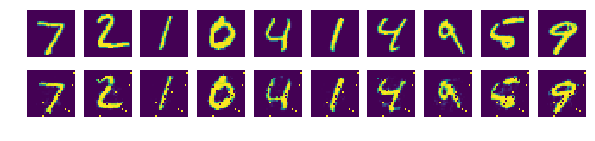

In [25]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

#########
# 신경망 모델 구성
######
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
# 디코더 레이어 구성
# 이 디코더가 최종 모델이 됩니다.
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해봅니다.
######
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()

# 20180101 월

Ch 6 순환 신경망

In [26]:
# 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.001
total_epoch = 30
batch_size = 128

# RNN 은 순서가 있는 자료를 다루므로,
# 한 번에 입력받는 갯수와, 총 몇 단계로 이루어져있는 데이터를 받을지를 설정해야합니다.
# 이를 위해 가로 픽셀수를 n_input 으로, 세로 픽셀수를 입력 단계인 n_step 으로 설정하였습니다.
n_input = 28
n_step = 28
n_hidden = 128
n_class = 10

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, n_step, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])

W = tf.Variable(tf.random_normal([n_hidden, n_class]))
b = tf.Variable(tf.random_normal([n_class]))

# RNN 에 학습에 사용할 셀을 생성합니다
# 다음 함수들을 사용하면 다른 구조의 셀로 간단하게 변경할 수 있습니다
# BasicRNNCell,BasicLSTMCell,GRUCell
cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)

# RNN 신경망을 생성합니다
# 원래는 다음과 같은 과정을 거쳐야 하지만
# states = tf.zeros(batch_size)
# for i in range(n_step):
#     outputs, states = cell(X[[:, i]], states)
# ...
# 다음처럼 tf.nn.dynamic_rnn 함수를 사용하면
# CNN 의 tf.nn.conv2d 함수처럼 간단하게 RNN 신경망을 만들어줍니다.
# 겁나 매직!!
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# 결과를 Y의 다음 형식과 바꿔야 하기 때문에
# Y : [batch_size, n_class]
# outputs 의 형태를 이에 맞춰 변경해야합니다.
# outputs : [batch_size, n_step, n_hidden]
#        -> [n_step, batch_size, n_hidden]
#        -> [batch_size, n_hidden]
outputs = tf.transpose(outputs, [1, 0, 2])
outputs = outputs[-1]
model = tf.matmul(outputs, W) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(total_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # X 데이터를 RNN 입력 데이터에 맞게 [batch_size, n_step, n_input] 형태로 변환합니다.
        batch_xs = batch_xs.reshape((batch_size, n_step, n_input))

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

test_batch_size = len(mnist.test.images)
test_xs = mnist.test.images.reshape(test_batch_size, n_step, n_input)
test_ys = mnist.test.labels

print('정확도:', sess.run(accuracy,
                       feed_dict={X: test_xs, Y: test_ys}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'Avg. cost =', '0.494')
('Epoch:', '0002', 'Avg. cost =', '0.240')
('Epoch:', '0003', 'Avg. cost =', '0.190')
('Epoch:', '0004', 'Avg. cost =', '0.157')
('Epoch:', '0005', 'Avg. cost =', '0.142')
('Epoch:', '0006', 'Avg. cost =', '0.133')
('Epoch:', '0007', 'Avg. cost =', '0.117')
('Epoch:', '0008', 'Avg. cost =', '0.112')
('Epoch:', '0009', 'Avg. cost =', '0.110')
('Epoch:', '0010', 'Avg. cost =', '0.109')
('Epoch:', '0011', 'Avg. cost =', '0.093')
('Epoch:', '0012', 'Avg. cost =', '0.091')
('Epoch:', '0013', 'Avg. cost =', '0.095')
('Epoch:', '0014', 'Avg. cost =', '0.086')
('Epoch:', '0015', 'Avg. cost =', '0.090')
('Epoch:', '0016', 'Avg. cost =', '0.083')
('Epoch:', '0017', 'Avg. cost =', '0.085')
('Epoch:', '0018', 'Avg. cost =', '0.080')
('Epoch:', '0019', 'Avg.